[ 9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2 11.4 11.6
 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.  14.2 14.4
 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6 16.8]
[0.93742516 0.57353543 0.71569608 0.99018954 0.99012472 0.59638112
 0.81902291 0.70759992 0.71229746 0.90100276 0.6857435  0.75616189
 0.56965205 0.72242039 0.93207762 0.65441054 0.62821019 0.51248864
 0.87259742 0.85413302 0.74793158 0.79657326 0.79874751 0.64699602
 0.99922901 0.98962526 0.60179638 0.73611279 0.65549925 0.85276916
 0.68287074 0.79765491 0.72319757 0.64971271 0.922545   0.7721402
 0.58146062 0.995587   0.66140724 0.61802654]


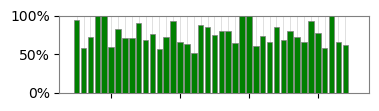

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
margin = 0.2
hours = np.arange(9, 17, margin)
values = np.random.uniform(0.5, 1.0, len(hours))
print(hours)
print(values)
# 绘制图形
fig, ax = plt.subplots(figsize=(4, 1), dpi=100)

# 绘制背景的灰线
for x in hours:
    ax.axvline(x=x, color='lightgrey', linestyle='-', linewidth=0.5)

# 绘制顶部圆角的绿色柱子
for i in range(len(hours)):
    ax.bar(hours[i], values[i] * 100, width=margin*0.8, color='green', edgecolor='grey', linewidth=0.5, zorder=3, capstyle='round')

# # 添加闪电图标的位置
# flash_hours = [6, 12, 18]
# for hour in flash_hours:
#     ax.annotate('⚡', xy=(hour, values[hour] * 100 + 5), xycoords='data', ha='center', va='center', fontsize=16, color='white')

# 自定义图形
ax.set_ylim(0, 100)
ax.set_xlim(8.5, 17.5)
ax.set_yticks([0, 50, 100])
ax.set_yticklabels(['0%', '50%', '100%'])
# ax.set_xticks([0, 6, 12, 18, 24])
ax.set_xticklabels([])

# 设置灰色边框
for spine in ax.spines.values():
    spine.set_edgecolor('grey')

# 移除网格线
ax.grid(False)

# 显示图形
plt.show()

/var/folders/9z/f33049_x6bs5y2xvclxp23j00000gn/T/ipykernel_6872/2003870564.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['0 KJ', '10 KJ', '20 KJ', '30 KJ'])


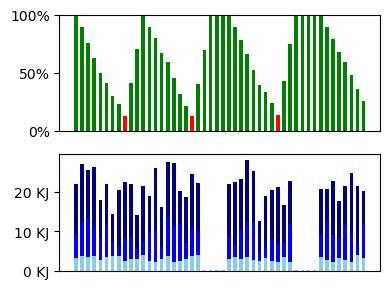

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# 模拟数据
time_intervals = np.arange(9, 8*60, 10)  # 每10分钟一个间隔，8小时
width = 6  # 每个时间段的宽度

# 背景能耗
background_energy_cost = np.random.uniform(1, 2, len(time_intervals))
# app本身使用量
app_usage = np.random.uniform(1, 5, len(time_intervals))
# 记录app的使用量
app_logging = np.random.uniform(3, 8, len(time_intervals))

# 在随机位置生成空白时间段
num_blank_segments = 2  # 生成空白时间段的数量
blank_length = np.random.randint(3, 6)  # 空白时间段的长度
for _ in range(num_blank_segments):
    start = np.random.randint(0, len(time_intervals) - max(6, blank_length))
    background_energy_cost[start:start+blank_length] = np.random.uniform(0.01, 0.05, blank_length)
    app_usage[start:start+blank_length] = 0
    app_logging[start:start+blank_length] = 0

# 总电量损耗
total_drain = background_energy_cost + app_usage + app_logging
battery_remaining = np.zeros(len(time_intervals))
battery_remaining[0] = 100  # 初始电量

# 计算每个时间点的剩余电量，并处理充电逻辑
charging_rate = 40  # 每10分钟充电25%
charging_threshold = 5  # 电量低于20%时开始充电
charging_flag = 0 # 充电标志,连续充电直至充满

for i in range(1, len(time_intervals)):
    battery_remaining[i] = battery_remaining[i-1] - total_drain[i-1]
    if battery_remaining[i] < charging_threshold or charging_flag == 1:
        # print(f'Charging at {time_intervals[i]}')
        charging_flag = 1
        battery_remaining[i] = min(battery_remaining[i] + charging_rate, 100)
        if battery_remaining[i] == 100:
            charging_flag = 0

# 创建图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 3), gridspec_kw={'height_ratios': [1, 1]})

# 电池电量图
colors = ['red' if val < 20 else 'green' for val in battery_remaining]
ax1.bar(time_intervals, battery_remaining, width=width, color=colors, label='Battery Remaining')
ax1.set_xticks([])
ax1.set_yticks([0, 50, 100])
ax1.set_yticklabels(['0%', '50%', '100%'])
ax1.set_ylim(0, 100)
# ax1.legend()

# 活动图 （单位：KJ）
p1 = ax2.bar(time_intervals, background_energy_cost, width=width, color='skyblue', label='Background Energy Cost')
p2 = ax2.bar(time_intervals, app_usage, width=width, bottom=background_energy_cost, color='blue', label='App Usage')
p3 = ax2.bar(time_intervals, app_logging, width=width, bottom=background_energy_cost+app_usage, color='navy', label='App Logging')

ax2.set_xticks([])
# ax2.set_yticks([0, 1, 2, 3])
ax2.set_yticklabels(['0 KJ', '10 KJ', '20 KJ', '30 KJ'])
# ax2.legend(['Others', 'Apps', 'Logging'], loc = 'upper right',  bbox_to_anchor=(-0.2, 2))

# 显示图表
plt.tight_layout()
plt.savefig("../figs/motivation-battery.pdf", bbox_inches='tight')
plt.show()

In [47]:
print(battery_remaining)

[100.          97.73172745  95.75310886  93.18570725  90.75945802
  88.4305377   85.89380756  82.93572483  80.3469053   77.78331591
  75.77949098  73.531434    70.78283755  68.1955701   65.78340877
  63.8559028   61.05286097  58.76000958  56.62568545  54.06166892
  51.76402746  49.87691788  47.59716475  45.35067452  42.89640194
  40.91614995  38.89739032  35.97998593  33.80674418  31.62802797
  29.26415779  27.25533314  25.06883867  22.88398024  20.43334154
  17.72324842  14.97416247  12.70622141  10.01218918   7.78033748
   5.13664968   2.5921851    0.           0.           0.
   0.           0.           0.        ]
